## Инициализация проекта

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


# Исследование данных

### Вывод базовой информации

In [81]:
data = pd.read_csv('../data/trip_duration_task.csv')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          727135 non-null  float64
 2   pickup_datetime    729322 non-null  object 
 3   dropoff_datetime   729322 non-null  object 
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    727475 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 55.6+ MB


In [83]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848


In [84]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,727135.000000,729322.000000,729322.000000,727475.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535377,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498747,1.312446,0.069754,0.033608,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737331,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754066,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768311,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Обработка пропусков

Выведем в % кол-во пропусков в каждом столбце:

In [85]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

vendor_id            0.299868
pickup_latitude      0.253249
id                   0.000000
pickup_datetime      0.000000
passenger_count      0.000000
dropoff_datetime     0.000000
pickup_longitude     0.000000
dropoff_longitude    0.000000
dropoff_latitude     0.000000
trip_duration        0.000000
dtype: float64

Максимальное кол-во пропусков на столбец не превышает 0.3%, поэтому можно удалить строки, в которых встречаются пропуски.

In [86]:
data.dropna(inplace=True)
data.isna().sum()

id                   0
vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
dtype: int64

### Обработка выбросов и аномалий

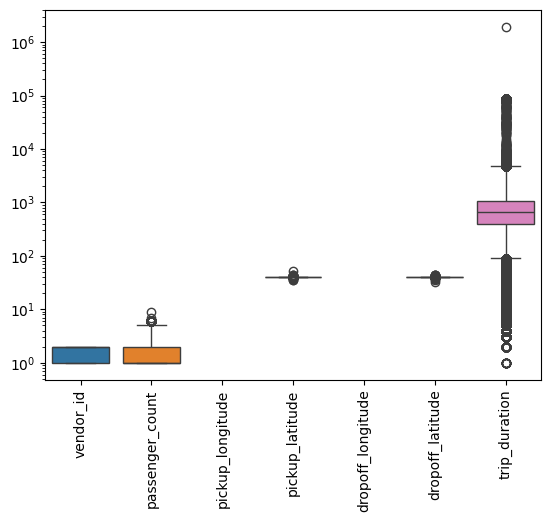

In [87]:
sns.boxplot(data, log_scale=True)
plt.xticks(rotation=90)
plt.show()

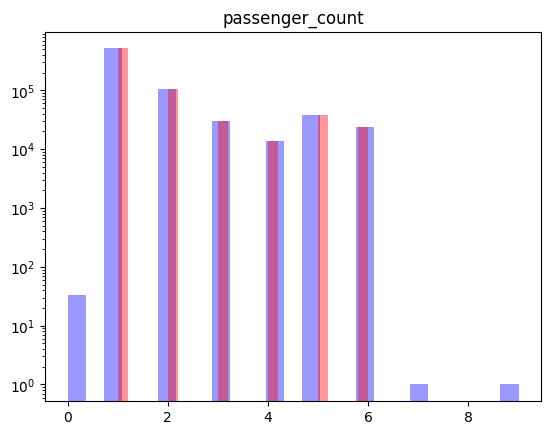

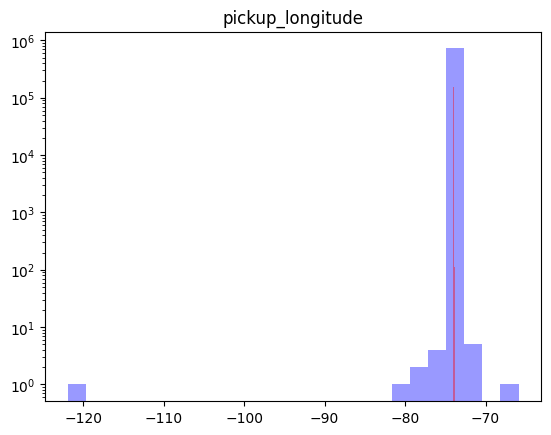

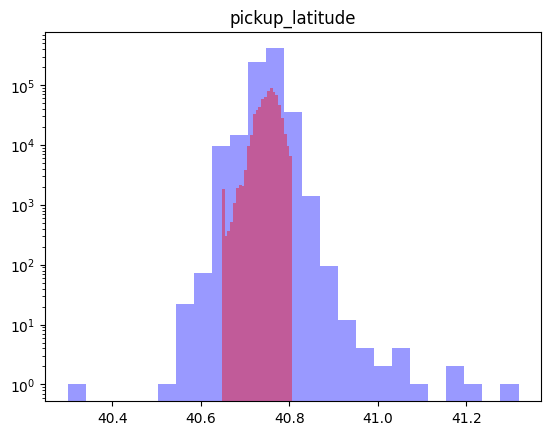

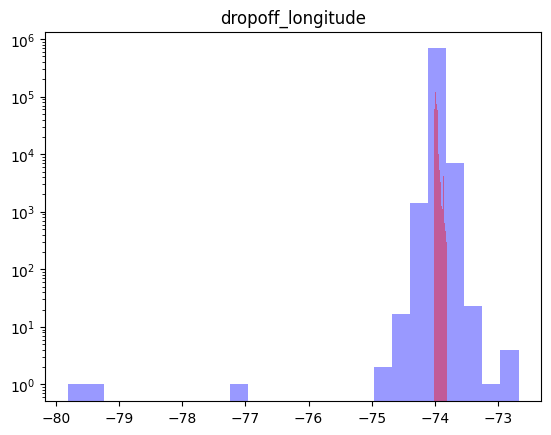

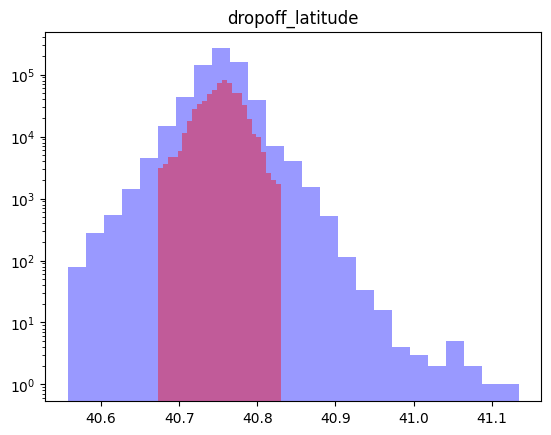

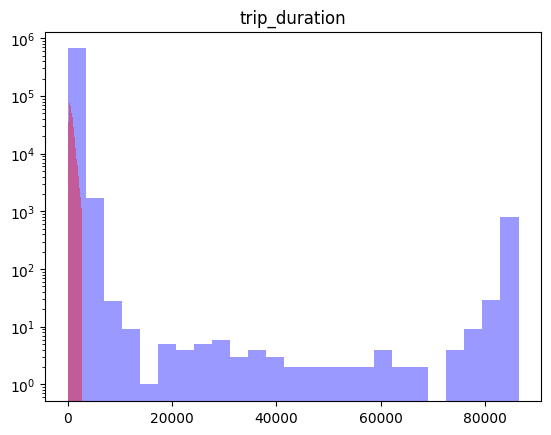

In [88]:
for column in data.columns:
    if column not in ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime']:
        plt.hist(data[column], bins=25, log=True,color='blue', alpha=0.4)
        lower_bound = data[column].quantile(0.01)
        upper_bound = data[column].quantile(0.99)

        data = data[data[column] >= lower_bound]
        data = data[data[column] <= upper_bound]
        plt.hist(data[column], bins=25, log=True,color='red', alpha=0.4)
        plt.title(column)
        plt.show()

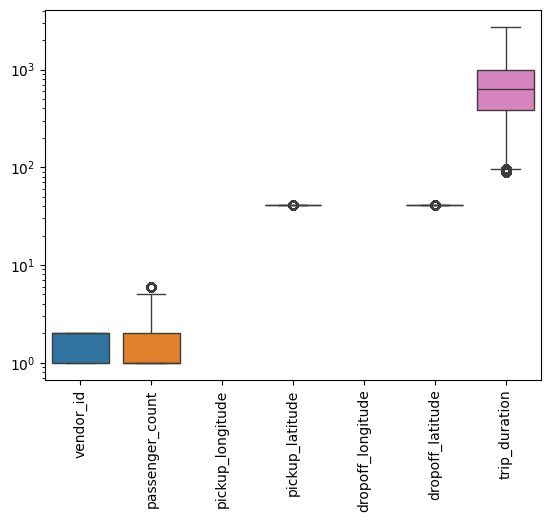

In [89]:
sns.boxplot(data, log_scale=True)
plt.xticks(rotation=90)
plt.show()

In [90]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.000000,655757.00000
mean,1.534347,1.659796,-73.977879,40.753132,-73.976145,40.753414,748.81871
std,0.498819,1.311869,0.024935,0.021905,0.024742,0.024999,480.98964
min,1.000000,1.000000,-74.014343,40.647179,-74.015038,40.672672,90.00000
25%,1.000000,1.000000,-73.991837,40.739460,-73.991287,40.738506,389.00000
50%,2.000000,1.000000,-73.982071,40.754902,-73.980247,40.755180,632.00000
75%,2.000000,2.000000,-73.969208,40.768250,-73.965401,40.769531,989.00000
max,2.000000,6.000000,-73.782516,40.806633,-73.809151,40.830524,2743.00000


### Обработка столбцов

Исходный датасет содержит столбцы, которые не содержат информации, имеющей свзять с продолжительностью поездки: id.

In [91]:
data.drop(columns=['id'], inplace=True)
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
5,2.0,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,1455


# Обогощение данных

### Исключительный случай

Датасет содержит столбец, содержащий информацию о времени начала поездки, что вплоне логично для задачи расчета продолжительности поездки, а также содержит столбец времени окончания поездки, что нелогично для данной задачи. Поэтому я решил удалить столбец времени окончания поездки, чтобы симулировать настояющую бизнес-задачу.

In [92]:
data.drop(columns=['dropoff_datetime'], inplace=True)
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455


Поскольку мой датасет содержит координаты поездок, я решил вывести некоторую выборку из них на карту, чтобы посмотреть как они распределены.

In [93]:
import folium
from shapely.geometry import Point, Polygon

data_sample = data.sample(frac=0.001) # 0.1%

m = folium.Map(location=[data_sample.iloc[0]['pickup_latitude'], data_sample.iloc[0]['pickup_longitude']], zoom_start=11.5)

nyc_center_polygon =  Polygon([
    (-73.955539, 40.829344),
    (-74.011861, 40.752701),
    (-74.01954326467963, 40.71452872820932),
    (-74.0153570038084, 40.69996899434237),
    (-73.9774198401262, 40.71129042453187),
    (-73.9717550144014, 40.72885435095875),
    (-73.94296996632072, 40.7761792515498),
    (-73.92970080603428, 40.801063436793875)
])

folium.Polygon(locations=[(y, x) for x, y in nyc_center_polygon.exterior.coords], 
               color="red", fill=True, fill_opacity=0.3, popup="NYC center").add_to(m)

for _, row in data_sample.iterrows():
    folium.Marker([row['pickup_latitude'], row['pickup_longitude']]).add_to(m)

for _, row in data_sample.iterrows():
    folium.Marker([row['dropoff_latitude'], row['dropoff_longitude']]).add_to(m)

m.save('../images/map.html')


### Анализ карты

Большая часть поездок распределена в центре города, также есть заметные скопления вокруг аэропортов, остальная часть равномерно распределена по городским окраинам. Я хотел проверить, есть ли в моих данных разбиение на городские/междугородние поездки. Такое разбиение не выявлено, но я заметил, что поездки делятся в основном на 2 типа: по центральной части Нью-Йорка (кварталы с небоскребами и многоэтажными домами), по удаленной части города (районы с мало-этажными строениями). Возможно, во второй части города трафик в среднем будет меньше, в связи с этим может иметь место присвоение каждой записи категориального признака принадлжености к одному из типов центр/окраина.

In [94]:

data['pickup_point'] = data.apply(lambda row: Point(row['pickup_longitude'], row['pickup_latitude']), axis=1)
data['dropoff_point'] = data.apply(lambda row: Point(row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

data['pickup_in_zone'] = data['pickup_point'].apply(lambda p: nyc_center_polygon.contains(p))
data['dropoff_in_zone'] = data['dropoff_point'].apply(lambda p: nyc_center_polygon.contains(p))

data['in_nyc_center?'] = data.apply(lambda row: 1 if row['pickup_in_zone'] or row['dropoff_in_zone'] else 0, axis=1)

data.drop(columns=['pickup_point', 'dropoff_point', 'pickup_in_zone', 'dropoff_in_zone'], inplace=True)

data.head(10)


,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1
6,1.0,2016-04-20 20:30:14,1,-73.965080,40.758915,-73.976807,40.764107,397,1
7,2.0,2016-06-19 16:48:14,1,-73.963890,40.765434,-73.872429,40.774200,1101,1
8,2.0,2016-03-28 19:17:03,2,-73.872887,40.774281,-73.979019,40.761879,1886,1
9,1.0,2016-04-10 22:01:41,1,-73.987823,40.740982,-73.999153,40.686451,1429,1
10,1.0,2016-01-17 19:40:26,1,-73.997116,40.722099,-74.006897,40.708321,527,1


### Извлечение дистанции поездки

Координаты, конечно, являются цифрами, но по ним сложнее выявить закономерности и обучить модель, так как для анализа расстояния между точкой посадки и высадки нужно проанализировать 4 переменные. Выделение из координат дистанции и ее последующий анализ будут понятнее и менее затратны.

In [95]:
from geopy.distance import geodesic

data['distance'] = data.apply(
    lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                          (row['dropoff_latitude'], row['dropoff_longitude'])).meters, axis=1
)
data.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,in_nyc_center?,distance
0,2.0,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,1,1199.769914
1,1.0,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,1,4123.945168
2,2.0,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,1,7250.435807
3,2.0,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2358.286547
5,2.0,2016-02-14 18:31:42,2,-73.993614,40.751884,-73.995422,40.723862,1455,1,3115.641570


### Перекодирование pickup_datetime

### Перекодирование vendor_id

### Удаление лишних столбцов

### Сохранение предобработанных данных

In [96]:
data.to_csv('../data/processed_trip_duration.csv', index=False)

# Выявление закономерностей в данных

# Бинарное кодирование